In [18]:
import sys
import json
import math
import numpy as np
import pandas as pd
from datetime import datetime
sys.path.append('../src/')
import bjorn_support as bs
import mutations as bm

In [73]:
m_fp = '/southpark/gisaid/metadata_2021-05-04-02-27.tsv.gz'
m = pd.read_csv(m_fp, sep='\t', compression='gzip')

In [74]:
g = '/home/al/data/geojsons/gadm_countries.json'
gdf = pd.read_json(g, lines=True).transpose().reset_index()
gdf.loc[gdf['index'].str.contains('Switzerland')]

,index,0
222,Switzerland,CHE


In [75]:
g = '/home/al/data/geojsons/gadm_divisions.json'
gdf = pd.read_json(g, lines=True).transpose().reset_index()
gdf.loc[gdf['index'].str.contains('Switzerland')]

,index,0
2977,Switzerland-Aargau,AG
2978,Switzerland-Appenzell Ausserrhoden,AR
2979,Switzerland-Appenzell Innerrhoden,AI
2980,Switzerland-Basel-Landschaft,BL
2981,Switzerland-Basel-Stadt,BS
2982,Switzerland-Bern,BE
2983,Switzerland-Fribourg,FR
2984,Switzerland-Genève,GE
2985,Switzerland-Glarus,GL
2986,Switzerland-Graubünden,GR


In [76]:
g = '/home/al/data/geojsons/gadm_divisions.json'
with open(g) as f:
    divisions = json.load(f)
g = '/home/al/data/geojsons/gadm_countries.json'
with open(g) as f:
    countries = json.load(f)

In [77]:
m['division_normed'] = m['division_normed'].fillna('None')

In [78]:
m.loc[m['division_normed'].str.contains('Rico')][['country_normed', 'division_normed', 'location_normed']]

,country_normed,division_normed,location_normed
15315,United States,Puerto Rico,None
15316,United States,Puerto Rico,None
15317,United States,Puerto Rico,None
15318,United States,Puerto Rico,None
15319,United States,Puerto Rico,None
...,...,...,...
1336228,United States,Puerto Rico,None
1336229,United States,Puerto Rico,None
1336230,United States,Puerto Rico,None
1336231,United States,Puerto Rico,None


In [79]:
m.loc[m['division']=='Puerto Rico', 'location'].value_counts()

None     637
Ponce     60
Name: location, dtype: int64

In [80]:
m.loc[m['country']=='Switzerland'][['country_normed', 
                                    'division_normed']].sort_values('division_normed')

,country_normed,division_normed
1638,Switzerland,Aargau
323656,Switzerland,Aargau
323657,Switzerland,Aargau
323658,Switzerland,Aargau
323659,Switzerland,Aargau
...,...,...
1192867,Switzerland,Zürich
1192866,Switzerland,Zürich
1192865,Switzerland,Zürich
1192871,Switzerland,Zürich


In [81]:
m['country_id'] = m['country'].apply(lambda x: countries.get(x, 'None')).astype(str)
m['tmp_info1'] = m['country_normed'] + '-' + m['division_normed']
m['division_id'] = m['tmp_info1'].apply(lambda x: divisions.get(x, 'None')).astype(str)

In [82]:
m.loc[m['country']=='Switzerland'][['tmp_info1', 'country_normed', 
                                    'division_normed', 'country_id', 'division_id']].sort_values('division_normed')

,tmp_info1,country_normed,division_normed,country_id,division_id
1638,Switzerland-Aargau,Switzerland,Aargau,CHE,AG
323656,Switzerland-Aargau,Switzerland,Aargau,CHE,AG
323657,Switzerland-Aargau,Switzerland,Aargau,CHE,AG
323658,Switzerland-Aargau,Switzerland,Aargau,CHE,AG
323659,Switzerland-Aargau,Switzerland,Aargau,CHE,AG
...,...,...,...,...,...
1192867,Switzerland-Zürich,Switzerland,Zürich,CHE,ZH
1192866,Switzerland-Zürich,Switzerland,Zürich,CHE,ZH
1192865,Switzerland-Zürich,Switzerland,Zürich,CHE,ZH
1192871,Switzerland-Zürich,Switzerland,Zürich,CHE,ZH


In [59]:
m['division_id']

0          NT
1          NT
2          NT
3          NT
4          NT
           ..
1355991    KS
1355992    KS
1355993    KS
1355994    KS
1355995    KS
Name: division_id, Length: 1355996, dtype: object

In [28]:
m.loc[(m['country_normed']=='Switzerland') & (m['division_normed']=='Zürich'), 'strain'].unique().shape

(4231,)

In [29]:
m.loc[(m['tmp_info1']=='Switzerland-Zürich'), 'strain'].unique().shape

(4231,)

In [8]:
m.loc[m['country']=='Switzerland'].drop_duplicates('strain', keep='last')['division_normed'].value_counts()

Zürich                    4231
Basel-Landschaft          3666
Bern                      3634
Genève                    3430
Solothurn                 3374
Basel-Stadt               2734
Aargau                    2500
Vaud                      2133
Valais                    1074
Neuchâtel                  857
Schaffhausen               755
Sankt Gallen               707
Schwyz                     685
Ticino                     560
None                       539
Basel-Land                 513
Geneve                     464
Thurgau                    431
Lucerne                    348
Graubunden                 179
Graubünden                 161
Uri                        139
GraubÃ¼nden                133
Fribourg                    75
NeuchÃ¢tel                  56
Jura                        55
Zug                         43
Berne                       39
Glarus                      31
Basel                       17
Obwalden                    16
Grisons                     15
Nidwalde

In [80]:
m_fp = '/southpark/gisaid/mutations_2021-05-02-15-00.csv'
m = pd.read_csv(m_fp)

/home/al/anaconda3/envs/bjorn/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [94]:
m.loc[lineage_filter, ['change_length_nt', 'absolute_coords']].value_counts()

change_length_nt  absolute_coords
2.0               21992:21993        66
3.0               21991:21993        24
dtype: int64

In [93]:
lineage_filter = (m['pangolin_lineage']=='A') & (m['mutation']=='S:DEL144/145')
m.loc[lineage_filter, 'country'].value_counts()

United Kingdom                      56
United States                       14
Germany                              4
Angola                               3
Australia                            3
Nigeria                              2
United Arab Emirates                 1
Norway                               1
China                                1
Sweden                               1
Gambia                               1
Democratic Republic of the Congo     1
Mexico                               1
India                                1
Name: country, dtype: int64

In [90]:
m['year'] = pd.to_datetime(m['date_collected']).dt.year
m['month'] = pd.to_datetime(m['date_collected']).dt.month

In [92]:
lineage_filter = (m['pangolin_lineage']=='A') & (m['mutation']=='S:DEL144/145')
m.loc[lineage_filter, ['year', 'month']].value_counts().to_frame().sort_values(['year', 'month'])

0
year month    
2020 2       1
     4       3
     5       1
     8       2
     12      1
2021 1       2
     2       9
     3      59
     4      12

In [ ]:
del_filt = (m['mutation'].str.contains('S:DEL144')) & (m['absolute_coords']=='21992:21993')
m.loc[del_filt]['mutation']

In [81]:
del_filt = (m['mutation'].str.contains('S:DEL144') & ()
m.loc[, ['change_length_nt', 'absolute_coords']].value_counts()

SyntaxError: invalid syntax (<ipython-input-81-3d0f71c4424e>, line 2)

In [73]:
del_filt = (m['mutation'].str.contains('S:DEL144')) & (m['absolute_coords']=='21992:21993')
m.loc[del_filt]['mutation']

64423       S:DEL144/143
1069934     S:DEL144/143
1544539     S:DEL144/143
1649781     S:DEL144/143
2559717     S:DEL144/143
                ...     
27311424    S:DEL144/143
28061749    S:DEL144/143
28197438    S:DEL144/143
28305080    S:DEL144/143
28698871    S:DEL144/143
Name: mutation, Length: 90, dtype: object

In [74]:
lineage_filter = (m['pangolin_lineage']=='A') & (m['mutation']=='S:DEL144/143')
m.loc[lineage_filter, 'country'].value_counts()

United Kingdom    55
Germany            4
Australia          3
Norway             1
Gambia             1
India              1
Sweden             1
Name: country, dtype: int64

In [76]:
m['year'] = pd.to_datetime(m['date_collected']).dt.year
m['month'] = pd.to_datetime(m['date_collected']).dt.month


In [78]:
lineage_filter = (m['pangolin_lineage']=='A') & (m['mutation']=='S:DEL144/143')
m.loc[lineage_filter, ['year', 'month']].value_counts()

year  month
2021  3        50
      4        11
      2         4
2020  8         1
dtype: int64

In [ ]:
t_fp = ""

In [51]:
m.loc[(m['type']=='deletion') & (m['pos']==21982), 'mutation'].value_counts()

S:DEL141/144    403
S:DEL141/141     66
S:DEL141/145      5
S:DEL141/142      1
S:DEL141/147      1
Name: mutation, dtype: int64

In [57]:
m.loc[(m['type']=='deletion') & (m['mutation']=='S:DEL141/141'), 'absolute_coords'].value_counts()

21982:21985    66
21983:21985    11
21981:21985     1
Name: absolute_coords, dtype: int64

In [59]:
m.loc[m['mutation'].str.contains('S:DEL141'), 'absolute_coords'].value_counts()

21981:21989    837
21982:21993    403
21982:21985     66
21983:21985     11
21981:21986      9
21982:21996      5
21983:21989      2
21983:21993      2
21982:22002      1
21982:21987      1
21981:21985      1
21983:22060      1
Name: absolute_coords, dtype: int64

In [60]:
del_filter = (m['mutation']=='S:DEL141/141') & (m['absolute_coords']=='21982:21985')
m.loc[del_filter, 'pangolin_lineage']

64422       A
1069933     A
1544538     A
1649780     A
2559716     A
           ..
27311423    A
28061748    A
28197437    A
28305079    A
28698870    A
Name: pangolin_lineage, Length: 66, dtype: object

In [56]:
m.loc[m['mutation']=='S:DEL141/141', ['absolute_coords', 'change_length_nt', 'pangolin_lineage']]

,absolute_coords,change_length_nt,pangolin_lineage
64422,21982:21985,4.0,A
1069933,21982:21985,4.0,A
1544538,21982:21985,4.0,A
1649780,21982:21985,4.0,A
2114384,21983:21985,3.0,B.1.375
...,...,...,...
27665829,21981:21985,5.0,B.1
28061748,21982:21985,4.0,A
28197437,21982:21985,4.0,A
28305079,21982:21985,4.0,A


In [43]:
m.columns

Index(['idx', 'seq_len', 'replacements', 'pos', 'gene', 'gene_start_pos',
       'codon_num', 'codon_start', 'ref_codon', 'alt_codon', 'ref_aa',
       'alt_aa', 'mutation', 'type', 'del_positions', 'change_length_nt',
       'relative_coords', 'absolute_coords', 'del_seq', 'prev_5nts',
       'next_5nts', 'pos_in_codon', 'deletion_codon_coords', 'is_frameshift',
       'is_synonymous', 'strain', 'covsurver_prot_mutations',
       'location_original', 'pangolin_lineage', 'date_collected',
       'accession_id', 'pangolin_version', 'clade', 'date_submitted',
       'country_original', 'division_original', 'country', 'division',
       'location', 'country_original_lower', 'country_lower',
       'division_original_lower', 'division_lower', 'location_original_lower',
       'location_lower', 'tmp', 'date_modified', 'country_id', 'tmp_info1',
       'division_id', 'tmp_info2', 'location_id'],
      dtype='object')

In [45]:
m.loc[m['mutation'].str.contains('S:DEL141'), 'absolute_coords'].value_counts()

21981:21989    837
21982:21993    403
21982:21985     66
21983:21985     11
21981:21986      9
21982:21996      5
21983:21989      2
21983:21993      2
21982:22002      1
21982:21987      1
21981:21985      1
21983:22060      1
Name: absolute_coords, dtype: int64

In [36]:
m.columns

Index(['idx', 'seq_len', 'replacements', 'pos', 'gene', 'gene_start_pos',
       'codon_num', 'codon_start', 'ref_codon', 'alt_codon', 'ref_aa',
       'alt_aa', 'mutation', 'type', 'del_positions', 'change_length_nt',
       'relative_coords', 'absolute_coords', 'del_seq', 'prev_5nts',
       'next_5nts', 'pos_in_codon', 'deletion_codon_coords', 'is_frameshift',
       'is_synonymous', 'strain', 'covsurver_prot_mutations',
       'location_original', 'pangolin_lineage', 'date_collected',
       'accession_id', 'pangolin_version', 'clade', 'date_submitted',
       'country_original', 'division_original', 'country', 'division',
       'location', 'country_original_lower', 'country_lower',
       'division_original_lower', 'division_lower', 'location_original_lower',
       'location_lower', 'tmp', 'date_modified', 'country_id', 'tmp_info1',
       'division_id', 'tmp_info2', 'location_id'],
      dtype='object')

In [36]:
cols = ['mutation', 'pos_in_codon', 'absolute_coords', 
        'deletion_codon_coords', 'change_length_nt', 'pangolin_lineage', 'del_seq', 'prev_5nts', 'next_5nts']

In [37]:
m.loc[m['mutation']=='S:DEL144/144'][cols]

,mutation,pos_in_codon,absolute_coords,deletion_codon_coords,change_length_nt,pangolin_lineage,del_seq,prev_5nts,next_5nts
159,S:DEL144/144,1.0,21991:21993,S:DEL144.33333333333334/145.33333333333334,3.0,B.1.526.1,ATT,GTGTT,TACCA
186,S:DEL144/144,1.0,21991:21993,S:DEL144.33333333333334/145.33333333333334,3.0,B.1.526.1,ATT,GTGTT,TACCA
216,S:DEL144/144,1.0,21991:21993,S:DEL144.33333333333334/145.33333333333334,3.0,B.1.526.1,ATT,GTGTT,TACCA
244,S:DEL144/144,1.0,21991:21993,S:DEL144.33333333333334/145.33333333333334,3.0,B.1.526.1,ATT,GTGTT,TACCA
270,S:DEL144/144,1.0,21991:21993,S:DEL144.33333333333334/145.33333333333334,3.0,B.1.526.1,ATT,GTGTT,TACCA
...,...,...,...,...,...,...,...,...,...
29287911,S:DEL144/144,1.0,21991:21993,S:DEL144.33333333333334/145.33333333333334,3.0,B.1.1.7,ATT,GTGTT,TACCA
29287914,S:DEL144/144,1.0,21991:21993,S:DEL144.33333333333334/145.33333333333334,3.0,B.1.1.7,ATT,GTGTT,TACCA
29287918,S:DEL144/144,1.0,21991:21993,S:DEL144.33333333333334/145.33333333333334,3.0,B.1.1.7,ATT,GTGTT,TACCA
29287925,S:DEL144/144,1.0,21991:21993,S:DEL144.33333333333334/145.33333333333334,3.0,B.1.1.7,ATT,GTGTT,TACCA


In [25]:
m.loc[m['mutation'].str.contains('S:DEL144'), 'mutation'].value_counts()

S:DEL144/144    486598
S:DEL144           957
S:DEL144/145       139
S:DEL144/143        90
S:DEL144/147         3
S:DEL144/146         2
S:DEL144/152         1
Name: mutation, dtype: int64

In [ ]:
m.loc[m]

In [19]:
m.columns

Index(['idx', 'seq_len', 'replacements', 'pos', 'gene', 'gene_start_pos',
       'codon_num', 'codon_start', 'ref_codon', 'alt_codon', 'ref_aa',
       'alt_aa', 'mutation', 'type', 'del_positions', 'change_length_nt',
       'relative_coords', 'absolute_coords', 'del_seq', 'prev_5nts',
       'next_5nts', 'pos_in_codon', 'deletion_codon_coords', 'is_frameshift',
       'is_synonymous', 'strain', 'covsurver_prot_mutations',
       'location_original', 'pangolin_lineage', 'date_collected',
       'accession_id', 'pangolin_version', 'clade', 'date_submitted',
       'country_original', 'division_original', 'country', 'division',
       'location', 'country_original_lower', 'country_lower',
       'division_original_lower', 'division_lower', 'location_original_lower',
       'location_lower', 'tmp', 'date_modified', 'country_id', 'tmp_info1',
       'division_id', 'tmp_info2', 'location_id'],
      dtype='object')

In [22]:
m.loc[(m['deletion_codon_coords']=='S:DEL141.33333333333334/142.66666666666669'), 'pangolin_lineage'].value_counts()

A    66
Name: pangolin_lineage, dtype: int64

In [44]:
(2//3)-1

-1

In [ ]:
['Aargau', 'Appenzell Ausserrhoden', 'Argovie', 'BE', 'Bale',
       'Basel', 'Basel-City', 'Basel-Land', 'Basel-Landschaft',
       'Basel-Stadt', 'Bern', 'Berne', 'Freibrug', 'Freiburg', 'Fribourg',
       'Geneva', 'Geneve', 'Glarus', 'Graubuenden', 'Graubunden',
       'GraubÃ¼nden', 'Graubünden', 'Graub�nden', 'Grisons', 'JU', 'Jura',
       'Lucerne', 'Luzern', 'Neuchatel', 'NeuchÃ¢tel', 'Neuchâtel',
       'Neuenburg', 'Nidwalden', 'None', 'Obwalden', 'Saint-Gall',
       'Sankt Gallen', 'Schaffhausen', 'Schaffhouse', 'Schwyz',
       'Solothurn', 'St Gallen', 'St. Gallen', 'St.Gallen',
       'Stankt Gallen', 'Tessin', 'Thurgau', 'Ticino', 'Unkown', 'Uri',
       'VALAIS', 'Valais', 'Vaud', 'Waadt', 'Wallis', 'Zaerich',
       'Zoerich', 'Zuerich', 'Zug', 'Zurich', 'Zürich']

In [24]:
g = '/home/al/data/geojsons/gadm_divisions.json'
gdf = pd.read_json(g, lines=True).transpose().reset_index()
gdf.loc[gdf['index'].str.contains('Switzerland')]

,index,0
2977,Switzerland-Aargau,AG
2978,Switzerland-Appenzell Ausserrhoden,AR
2979,Switzerland-Appenzell Innerrhoden,AI
2980,Switzerland-Basel-Landschaft,BL
2981,Switzerland-Basel-Stadt,BS
2982,Switzerland-Bern,BE
2983,Switzerland-Fribourg,FR
2984,Switzerland-Genève,GE
2985,Switzerland-Glarus,GL
2986,Switzerland-Graubünden,GR


In [26]:
m_fp = '/southpark/gisaid/metadata_2021-04-29-09-00.tsv.gz'
df = pd.read_csv(m_fp, sep='\t', compression='gzip')

In [31]:
df.loc[(df['country_normed']=='Switzerland'), 'division_normed'].sort_values().unique()

array(['Aargau', 'Appenzell Ausserrhoden', 'Argovie', 'BE', 'Bale',
       'Basel', 'Basel-City', 'Basel-Land', 'Basel-Landschaft',
       'Basel-Stadt', 'Bern', 'Berne', 'Freibrug', 'Freiburg', 'Fribourg',
       'Geneva', 'Geneve', 'Glarus', 'Graubuenden', 'Graubunden',
       'GraubÃ¼nden', 'Graubünden', 'Graub�nden', 'Grisons', 'JU', 'Jura',
       'Lucerne', 'Luzern', 'Neuchatel', 'NeuchÃ¢tel', 'Neuchâtel',
       'Neuenburg', 'Nidwalden', 'None', 'Obwalden', 'Saint-Gall',
       'Sankt Gallen', 'Schaffhausen', 'Schaffhouse', 'Schwyz',
       'Solothurn', 'St Gallen', 'St. Gallen', 'St.Gallen',
       'Stankt Gallen', 'Tessin', 'Thurgau', 'Ticino', 'Unkown', 'Uri',
       'VALAIS', 'Valais', 'Vaud', 'Waadt', 'Wallis', 'Zaerich',
       'Zoerich', 'Zuerich', 'Zug', 'Zurich', 'Zürich'], dtype=object)

In [21]:
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Sodermanland'), 'division_normed'] = 'Södermanland'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Gavleborg'), 'division_normed'] = 'Gävleborg'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Jamtland'), 'division_normed'] = 'Jämtland'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Jonkoping'), 'division_normed'] = 'Jönköping'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Ostergotland'), 'division_normed'] = 'Östergötland'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Skane'), 'division_normed'] = 'Skåne'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Sodermanland'), 'division_normed'] = 'Södermanland'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Varmland'), 'division_normed'] = 'Värmland'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Vasterbotten'), 'division_normed'] = 'Västerbotten'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Vasternorrland'), 'division_normed'] = 'Västernorrland'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Vastmanland'), 'division_normed'] = 'Västmanland'
df.loc[(df['country_normed']=='Sweden')
      &(df['division_normed']=='Vastra Gotaland'), 'division_normed'] = 'Västra Götaland'

In [ ]:
Södermanland
Gävleborg
Jämtland
Jönköping
Östergötland
Skåne
Södermanland
Värmland
Västerbotten
Västernorrland
Västmanland
Västra Götaland

In [17]:
df.loc[m['country_normed']=='Sweden', ['division', 'division_normed']].drop_duplicates().sort_values('division')

,division,division_normed
322512,Blekinge,Blekinge
15404,Dalarna,Dalarna
34134,Gavleborg,Gävleborg
4337,Gavleborgs lan,Gavleborgs lan
97056,Gotland,Gotland
4298,Halland,Halland
15409,Jamtland,Jämtland
53242,Jamtland Harjedalen,Jamtland Harjedalen
30573,Jonkoping,Jönköping
1173395,Jonkopings lan,Jonkopings lan


In [10]:
m.loc[(m['country_normed']=='Austria') & (m['division_normed']=='Tyrol')]

,strain,covsurver_prot_mutations,location,pangolin_lineage,date_collected,accession_id,pangolin_version,clade,date_submitted,country,division,country_normed,division_normed,location_normed,country_lower,country_normed_lower,division_lower,division_normed_lower,location_lower,location_normed_lower
18152,Austria/CeMM0184/2020,"(NS3_Q57H,NSP2_T85I,NSP12_P323L,Spike_D614G)",None,B.1,2020-03-11,EPI_ISL_438026,2021-04-21,GH,2020-05-12,Austria,Tyrol,Austria,Tyrol,None,austria,austria,tyrol,tyrol,none,none
18193,Austria/CeMM0237/2020,"(Spike_T747I,NSP12_P323L,Spike_D614G)",None,B.1,2020-03-19,EPI_ISL_438067,2021-04-21,G,2020-05-12,Austria,Tyrol,Austria,Tyrol,None,austria,austria,tyrol,tyrol,none,none
18221,Austria/CeMM0266/2020,"(NSP2_G212D,NSP3_A1431V,NSP3_A58T,NS3_K67N)",None,B.3,2020-03-24,EPI_ISL_438095,2021-04-21,L,2020-05-12,Austria,Tyrol,Austria,Tyrol,None,austria,austria,tyrol,tyrol,none,none
18240,Austria/CeMM0290/2020,"(NS3_Q57H,NSP2_T85I,NSP12_P323L,Spike_D614G)",None,B.1,2020-03-27,EPI_ISL_438114,2021-04-21,GH,2020-05-12,Austria,Tyrol,Austria,Tyrol,None,austria,austria,tyrol,tyrol,none,none
18241,Austria/CeMM0291/2020,"(NS3_Q57H,NSP2_T85I,NSP12_P323L,Spike_D614G)",None,B.1,2020-03-27,EPI_ISL_438115,2021-04-21,GH,2020-05-12,Austria,Tyrol,Austria,Tyrol,None,austria,austria,tyrol,tyrol,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225093,Austria/MUIV-0044/2021,"(Spike_H69del,NS8_Q27stop,NSP3_T183I,Spike_T71...",Innsbruck,B.1.1.7,2021-03-25,EPI_ISL_1712592,2021-04-21,GRY,2021-04-24,Austria,Tyrol,Austria,Tyrol,Innsbruck,austria,austria,tyrol,tyrol,innsbruck,innsbruck
1225094,Austria/MUIV-0045/2021,"(Spike_H69del,NS8_Q27stop,NSP3_T183I,Spike_T71...",Lienz,B.1.1.7,2021-03-03,EPI_ISL_1712593,2021-04-21,GRY,2021-04-24,Austria,Tyrol,Austria,Tyrol,Lienz,austria,austria,tyrol,tyrol,lienz,lienz
1225095,Austria/MUIV-0046/2021,"(Spike_H69del,NS8_Q27stop,NSP3_T183I,Spike_T71...",Innsbruck,B.1.1.7,2021-03-19,EPI_ISL_1712594,2021-04-21,GRY,2021-04-24,Austria,Tyrol,Austria,Tyrol,Innsbruck,austria,austria,tyrol,tyrol,innsbruck,innsbruck
1225096,Austria/MUIV-0047/2021,"(Spike_H69del,NS8_Q27stop,NSP3_T183I,Spike_T71...",Innsbruck,B.1.1.7,2021-03-19,EPI_ISL_1712595,2021-04-21,GRY,2021-04-24,Austria,Tyrol,Austria,Tyrol,Innsbruck,austria,austria,tyrol,tyrol,innsbruck,innsbruck


In [3]:
m_fp = '/southpark/gisaid/mutations_2021-04-17-15-00.csv'
m = pd.read_csv(m_fp)

/home/al/anaconda3/envs/bjorn/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
loc_filter = (m['country']=='South Africa') & (m['division']=='KwaZulu Natal')
m.loc[loc_filter, 'division'] = 'KwaZulu-Natal'
m.loc[loc_filter]['division']

Series([], Name: division, dtype: object)

In [10]:
loc_filter = (m['country']=='South Africa') & (m['division']=='Northern Cape Province')
m.loc[loc_filter, 'division'] = 'Northern Cape'
m.loc[loc_filter]['division']

Series([], Name: division, dtype: object)

In [96]:
m.loc[m['strain']=='USA/CA-CDC-LC0024511/2021']

,idx,seq_len,replacements,pos,gene,gene_start_pos,codon_num,codon_start,ref_codon,alt_codon,...,division_lower,location_original_lower,location_lower,tmp,date_modified,country_id,tmp_info1,division_id,tmp_info2,location_id
22714448,USA/CA-CDC-LC0024511/2021,29409,None,11288,ORF1a,267,3675,None,TGGTTTTAA,None,...,california,none,none,"['2021', '03', '01']",2021-04-15-09:00,USA,United States-California,CA,United States-California-None,None


In [99]:
d = bs.load_fasta('/southpark/tmp/cdc_b117_sample_aligned.fasta', is_aligned=True)

In [ ]:
def identify_replacements_per_sample(cns, 
                                     meta_fp=None,
                                     gene2pos: dict=bd.GENE2POS,
                                     data_src: str='gisaid',
                                     min_seq_len=20000,
                                     max_num_subs=5000,
                                     patient_zero: str='NC_045512.2',
                                     ref_path: str='/home/al/data/hcov19/NC045512.fasta',
                                     test: bool=False):
    """Returns dataframe of all substitution-based mutations from a pre-loaded multiple sequence alignment, 
    containing the reference sequence (default: NC_045512.2)
    The data is NOT aggregated, meaning that there will be a record for each observed substitution for each sample"""
    print(f"Initial cleaning...")
    seqs, ref_seq = process_cns_seqs(cns, patient_zero,
                                     start_pos=0, end_pos=29674)
#     ref_seq = get_seq_from_fasta(ref_path)
    seqsdf = (pd.DataFrame(index=seqs.keys(), 
                           data=seqs.values(), 
                           columns=['sequence'])
                .reset_index()
                .rename(columns={'index': 'idx'}))
    if test:
        seqsdf = seqsdf.sample(100)
    try:
        # compute length of each sequence
        seqsdf['seq_len'] = seqsdf['sequence'].str.len()
        # filter out seqs that are too short
        seqsdf = seqsdf[seqsdf['seq_len']>min_seq_len]
        print(f"Identifying mutations...")
        # for each sample, identify list of substitutions (position:alt)
        seqsdf['replacements'] = seqsdf['sequence'].apply(find_replacements, 
                                                        args=(ref_seq,))
        # sequences with one or more substitutions
        seqsdf = seqsdf.loc[seqsdf['replacements'].str.len() > 0]
        seqsdf = seqsdf.loc[seqsdf['replacements'].str.len() < max_num_subs]
        seqs = dict(zip(seqsdf['idx'], seqsdf['sequence']))
        # drop the actual sequences to save mem
        seqsdf.drop(columns=['sequence'], inplace=True)
        gc.collect();
        # wide-to-long data manipulation
        seqsdf = seqsdf.explode('replacements')
        # initialize position column
        seqsdf['pos'] = -1
        # populate position column
        seqsdf.loc[~seqsdf['replacements'].isna(), 'pos'] = (seqsdf.loc[~seqsdf['replacements'].isna(), 'replacements']
        .apply(lambda x: int(x.split(':')[0])))
        # filter out non-substitutions
        seqsdf = seqsdf.loc[seqsdf['pos']!=-1]
        print(f"Mapping Genes to mutations...")
        # identify gene of each substitution
        seqsdf['gene'] = seqsdf['pos'].apply(map_gene_to_pos)
        seqsdf.loc[seqsdf['gene'].isna(), 'gene'] = 'Non-coding region'
        seqsdf.loc[seqsdf['gene']=='nan', 'gene'] = 'Non-coding region'
        # seqsdf = seqsdf.loc[~seqsdf['gene'].isna()]
        # seqsdf = seqsdf.loc[seqsdf['gene']!='nan']
        # filter our substitutions in non-gene positions
        seqsdf = seqsdf.loc[seqsdf['gene']!='nan']
        print(f"Computing codon numbers...")
        # compute codon number of each substitution
        seqsdf['gene_start_pos'] = seqsdf['gene'].apply(lambda x: gene2pos.get(x, {}).get('start', 0))
        seqsdf['codon_num'] = np.ceil((seqsdf['pos'] - seqsdf['gene_start_pos'] + 1) / 3).astype(int)
        # seqsdf['codon_num'] = seqsdf.apply(compute_codon_num, args=(gene2pos,), axis=1)
        print(f"Fetching reference codon...")
        # fetch the reference codon for each substitution
        seqsdf['codon_start'] = seqsdf['gene_start_pos'] + (3*(seqsdf['codon_num'] - 1))
        seqsdf['ref_codon'] = seqsdf['codon_start'].apply(lambda x: ref_seq[x:x+3].upper())
        # seqsdf['ref_codon'] = seqsdf.apply(get_ref_codon, args=(ref_seq, gene2pos), axis=1)
        print(f"Fetching alternative codon...")
        # fetch the alternative codon for each substitution
        seqsdf['alt_codon'] = seqsdf[['idx', 'codon_start']].apply(get_alt_codon, args=(seqs,), axis=1)
        # seqsdf['alt_codon'] = seqsdf.apply(get_alt_codon_old, args=(seqs, gene2pos,), axis=1)
        del seqs
        gc.collect();
        print(f"Mapping amino acids...")
        # fetch the reference and alternative amino acids
        seqsdf['ref_aa'] = seqsdf['ref_codon'].apply(get_aa)
        seqsdf['alt_aa'] = seqsdf['alt_codon'].apply(get_aa)
        # filter out substitutions with non-amino acid alternates (bad consensus calls)
        seqsdf = seqsdf.loc[seqsdf['alt_aa']!='nan']
        print("Naming substitutions")
        seqsdf['mutation'] = seqsdf['gene'] + ':' + seqsdf['ref_aa'] + seqsdf['codon_num'].astype(str) + seqsdf['alt_aa']
        seqsdf['type'] = 'substitution'
        print(f"Fusing with metadata...")
        # load and join metadata
        if meta_fp:
            if data_src=='alab':
                meta = pd.read_csv(meta_fp)
                seqsdf = pd.merge(seqsdf, meta, left_on='idx', right_on='fasta_hdr')
                # clean and process sample collection dates
                seqsdf = seqsdf.loc[(seqsdf['collection_date']!='Unknown') 
                            & (seqsdf['collection_date']!='1900-01-00')]
                seqsdf.loc[seqsdf['collection_date'].str.contains('/'), 'collection_date'] = seqsdf['collection_date'].apply(lambda x: x.split('/')[0])
                seqsdf['date'] = pd.to_datetime(seqsdf['collection_date'])
            elif data_src=='gisaid':
                meta = pd.read_csv(meta_fp, sep='\t', compression='gzip')
                # filter out improper collection dates
                # meta['tmp'] = meta['date'].str.split('-')
                # meta = meta[meta['tmp'].str.len()>=3]
                seqsdf = pd.merge(seqsdf, meta, left_on='idx', right_on='strain')
                # seqsdf['date'] = pd.to_datetime(seqsdf['date'], errors='coerce')
                # seqsdf['month'] = seqsdf['date'].dt.month
                seqsdf.loc[seqsdf['location'].isna(), 'location'] = 'unk'
                seqsdf = seqsdf[seqsdf['host']=='Human']
                seqsdf.loc[seqsdf['country']=='USA', 'country'] = 'United States of America'
            elif data_src=='gisaid_feed':
                meta = pd.read_csv(meta_fp, sep='\t', compression='gzip')
                seqsdf = pd.merge(seqsdf, meta, left_on='idx', right_on='strain')
                # seqsdf.loc[seqsdf['country']=='USA', 'country'] = 'United States of America'
            else:
                raise ValueError(f"user-specified data source {data_src} not recognized. Aborting.")
    except:
        print(f"No substitutions found in any of the sequences in the alignment. Output will contain an empty dataframe")
        seqsdf = pd.DataFrame()
    return seqsdf, ref_seq

In [108]:
patient_zero = 'NC_045512.2'
min_seq_len = 20000
max_num_subs = 5000
seqs, ref_seq = bm.process_cns_seqs(d, patient_zero,
                                 start_pos=0, end_pos=29674)
#     ref_seq = get_seq_from_fasta(ref_path)
seqsdf = (pd.DataFrame(index=seqs.keys(), 
                       data=seqs.values(), 
                       columns=['sequence'])
            .reset_index()
            .rename(columns={'index': 'idx'}))
# compute length of each sequence
seqsdf['seq_len'] = seqsdf['sequence'].str.len()
# filter out seqs that are too short
seqsdf = seqsdf[seqsdf['seq_len']>min_seq_len]
print(f"Identifying mutations...")
# for each sample, identify list of substitutions (position:alt)
seqsdf['replacements'] = seqsdf['sequence'].apply(bm.find_replacements, 
                                                args=(ref_seq,))
# sequences with one or more substitutions
seqsdf = seqsdf.loc[seqsdf['replacements'].str.len() > 0]
seqsdf = seqsdf.loc[seqsdf['replacements'].str.len() < max_num_subs]

Identifying mutations...


In [112]:
seqsdf['replacements'].iloc[0]

['240:T',
 '912:T',
 '2109:T',
 '3036:T',
 '3266:T',
 '5337:N',
 '5338:N',
 '5339:N',
 '5340:N',
 '5341:N',
 '5342:N',
 '5343:N',
 '5344:N',
 '5345:N',
 '5346:N',
 '5347:N',
 '5348:N',
 '5349:N',
 '5350:N',
 '5351:N',
 '5352:N',
 '5353:N',
 '5354:N',
 '5355:N',
 '5356:N',
 '5357:N',
 '5358:N',
 '5359:N',
 '5360:N',
 '5361:N',
 '5362:N',
 '5363:N',
 '5364:N',
 '5365:N',
 '5366:N',
 '5367:N',
 '5368:N',
 '5369:N',
 '5370:N',
 '5371:N',
 '5372:N',
 '5373:N',
 '5374:N',
 '5375:N',
 '5376:N',
 '5377:N',
 '5378:N',
 '5379:N',
 '5380:N',
 '5381:N',
 '5382:N',
 '5383:N',
 '5384:N',
 '5385:N',
 '5386:N',
 '5387:N',
 '5388:N',
 '5389:N',
 '5390:N',
 '5391:N',
 '5392:N',
 '5393:N',
 '5394:N',
 '5395:N',
 '5396:N',
 '5397:N',
 '5398:N',
 '5399:N',
 '5400:N',
 '5401:N',
 '5402:N',
 '5403:N',
 '5404:N',
 '5405:N',
 '5406:N',
 '5407:N',
 '5408:N',
 '5409:N',
 '5410:N',
 '5411:N',
 '5412:N',
 '5413:N',
 '5414:N',
 '5415:N',
 '5416:N',
 '5417:N',
 '5418:N',
 '5419:N',
 '5420:N',
 '5421:N',
 '5422:N',
 

In [101]:
bm.identify_replacements_per_sample(d)

Initial cleaning...
Identifying mutations...
Mapping Genes to mutations...
Computing codon numbers...
Fetching reference codon...
Fetching alternative codon...
Mapping amino acids...
Naming substitutions
Fusing with metadata...


(Empty DataFrame
 Columns: [idx, seq_len, replacements, pos, gene, gene_start_pos, codon_num, codon_start, ref_codon, alt_codon, ref_aa, alt_aa, mutation, type]
 Index: [],
 'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGA

In [76]:
m.columns

Index(['idx', 'seq_len', 'replacements', 'pos', 'gene', 'gene_start_pos',
       'codon_num', 'codon_start', 'ref_codon', 'alt_codon', 'ref_aa',
       'alt_aa', 'mutation', 'type', 'del_positions', 'change_length_nt',
       'relative_coords', 'absolute_coords', 'del_seq', 'prev_5nts',
       'next_5nts', 'pos_in_codon', 'deletion_codon_coords', 'is_frameshift',
       'is_synonymous', 'strain', 'covsurver_prot_mutations',
       'location_original', 'pangolin_lineage', 'date_collected',
       'accession_id', 'pangolin_version', 'clade', 'date_submitted',
       'country_original', 'division_original', 'country', 'division',
       'location', 'country_original_lower', 'country_lower',
       'division_original_lower', 'division_lower', 'location_original_lower',
       'location_lower', 'tmp', 'date_modified', 'country_id', 'tmp_info1',
       'division_id', 'tmp_info2', 'location_id'],
      dtype='object')

In [77]:
excl_genes = ['5UTR', '3UTR']
m = m.loc[~m['gene'].isin(excl_genes)]

In [93]:
m.loc[m['strain']=='USA/CA-CDC-LC0024511/2021', 'mutation']

22714448    ORF1a:DEL3675/3677
Name: mutation, dtype: object

In [78]:
groupbycols = ['strain', 'accession_id', 'date_collected', 'country', 'location', 'division', 'pangolin_lineage']
ans = (m.groupby(groupbycols)
       .agg(num_mutations=('mutation', 'nunique'))
       .reset_index())

In [81]:
ans2 = (ans.loc[(ans['date_collected']>='2021-01-01')].sort_values('num_mutations', ascending=False))

In [91]:
loc = ''
div = 'California'
ans3 = ans2[(ans2['num_mutations']<=5) 
            & (ans['location'].str.contains(loc))
           & (ans['division'].str.contains(div))]
ans3['idx'] = ans3['strain'].apply(lambda x : x.split('/')[1]).unique()
ans3[['strain', 'idx', 'date_collected', 'pangolin_lineage']]

/home/al/anaconda3/envs/bjorn/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/al/anaconda3/envs/bjorn/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,strain,idx,date_collected,pangolin_lineage
810951,USA/CA-CZB-25845/2021,CA-CZB-25845,2021-02-03,B.1
810885,USA/CA-CZB-25777/2021,CA-CZB-25777,2021-02-03,B.1
824357,USA/CA-UCSF-UC961/2021,CA-UCSF-UC961,2021-01-07,B.1
810901,USA/CA-CZB-25793/2021,CA-CZB-25793,2021-02-03,B.1
810952,USA/CA-CZB-25846/2021,CA-CZB-25846,2021-02-03,B.1
...,...,...,...,...
799384,USA/CA-CDC-LC0027719/2021,CA-CDC-LC0027719,2021-03-08,B.1
799062,USA/CA-CDC-LC0024146/2021,CA-CDC-LC0024146,2021-03-02,A
798969,USA/CA-CDC-LC0018880/2021,CA-CDC-LC0018880,2021-02-15,B.1.596
799179,USA/CA-CDC-LC0024511/2021,CA-CDC-LC0024511,2021-03-01,B.1.1.7


In [54]:
loc_list = ['San Diego', 'New York', 'Harris']
ans3 = (ans2.loc[(ans2['num_mutations']<15) 
          & (ans2['country']=='United States')]
.groupby(['pangolin_lineage', 'location']).size().reset_index())
ans3[ans3['pangolin_lineage']=='B.1'].sort_values(0, ascending=False).head(50)

,pangolin_lineage,location,0
20,B.1,None,316
19,B.1,New York,219
14,B.1,Harris,37
18,B.1,Maricopa,19
25,B.1,Washoe,4
24,B.1,San Diego,3
26,B.1,Yuma,2
10,B.1,Clark,2
11,B.1,Dallas,2
13,B.1,El Paso,2


In [ ]:
loc = 'San Diego'
div = 'California'
plt.figure(figsize=(20,10))
loc_muts = ans[(ans['location'].str.contains(loc)) & (ans['division']==div)]['num_mutations']
loc_time = pd.to_datetime(ans[(ans['location'].str.contains(loc)) & (ans['division']==div)]['date_collected'])

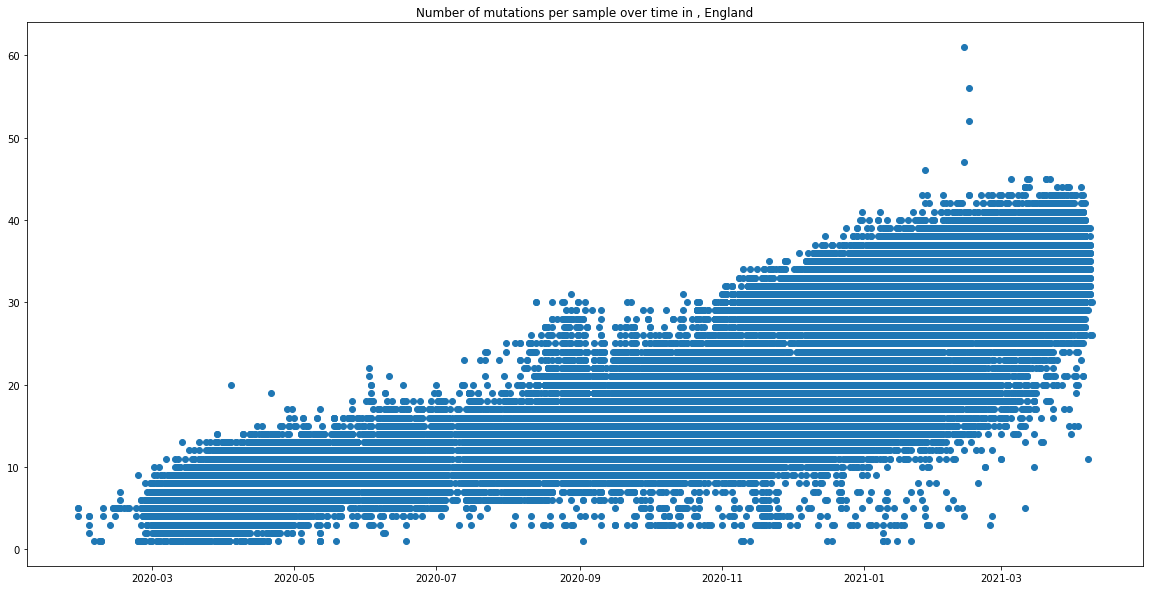

In [70]:
import matplotlib.pylab as plt
loc = 'San Diego'
div = 'California'
plt.figure(figsize=(20,10))
loc_muts = ans[(ans['location'].str.contains(loc)) & (ans['division']==div)]['num_mutations']
loc_time = pd.to_datetime(ans[(ans['location'].str.contains(loc)) & (ans['division']==div)]['date_collected'])
loc_lins = ans[(ans['location'].str.contains(loc))]['pangolin_lineage'] # 
plt.title(f'Number of mutations per sample over time in {loc}, {div}')
plt.scatter(loc_time, loc_muts)

/home/al/anaconda3/envs/bjorn/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


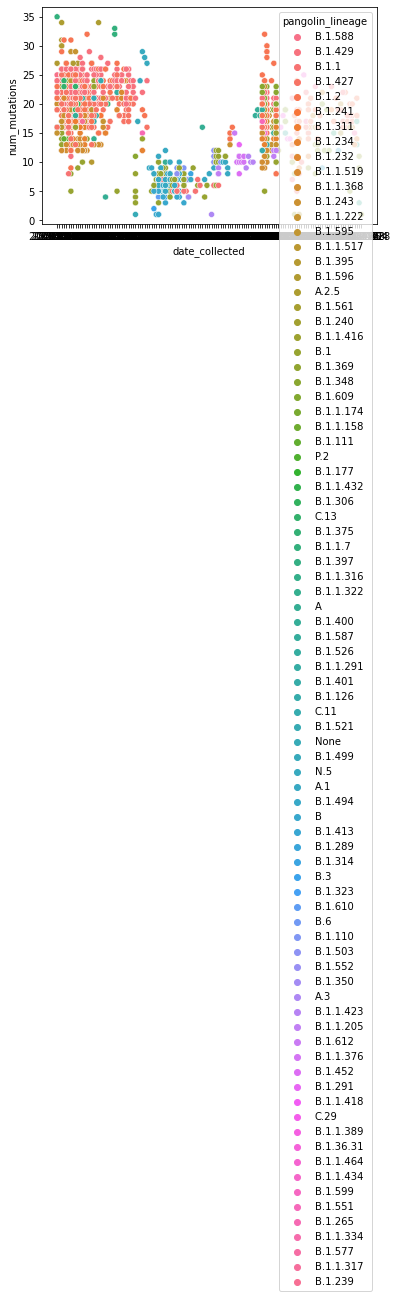

In [47]:
import seaborn as sns
df = ans[ans['location'].str.contains(loc)].copy()
sns.scatterplot('date_collected', 'num_mutations', data=df, hue='pangolin_lineage')
plt.show()

In [14]:
ans2[ans2['location'].str.contains('Diego')]

,date_collected,location,accession_id,num_mutations


In [12]:
ans3 = ans2.groupby(['location']).agg(num_samples=('accession_id', 'nunique')).reset_index().sort_values('num_samples', ascending=False)
ans3

,location,num_samples
96,None,3057
91,Napoli,771
51,Harris,295
4,Alsace,220
95,New York,203
...,...,...
61,Junin,1
60,Jose C. Paz,1
59,Jalpaiguri,1
58,Ionadi,1


In [13]:
ans3[ans3['location']=='San Diego']

,location,num_samples


In [4]:
m.loc[m['strain'].str.contains('SEARCH-7554'), 'mutation'].unique()

array(['ORF1a:S216S', 'ORF1a:F924F', 'ORF1a:T1001I', 'ORF1a:A1708D',
       'ORF1a:F1907F', 'ORF1a:I2230T', 'ORF1a:F2780L', 'ORF1a:P2792S',
       'ORF1b:V157V', 'ORF1b:P314L', 'ORF1b:P403P', 'ORF1b:H604H',
       'ORF1b:T903T', 'ORF1b:K1383R', 'S:N501Y', 'S:A570D', 'S:D614G',
       'S:P681H', 'S:T716I', 'S:S982A', 'S:D1118H', 'ORF3a:L15F',
       'ORF3a:K67N', 'ORF8:Q27*', 'ORF8:R52I', 'ORF8:Y73C', 'N:D3L',
       'N:R203K', 'N:G204R', 'N:S235F', 'ORF1a:DEL3675/3677',
       'S:DEL69/70', 'S:DEL144/144'], dtype=object)

In [5]:
m.loc[m['strain'].str.contains('SEARCH-7555'), 'mutation'].unique()

array(['ORF1a:T265I', 'ORF1a:G408G', 'ORF1a:E637K', 'ORF1a:V710V',
       'ORF1a:L729L', 'ORF1a:L778L', 'ORF1a:S911A', 'ORF1a:F924F',
       'ORF1a:V2238V', 'ORF1a:N2894N', 'ORF1a:A3945A', 'ORF1a:I4205V',
       'ORF1b:P314L', 'ORF1b:D1183Y', 'S:S13I', 'S:W152C', 'S:L452R',
       'S:D614G', 'S:S929S', 'ORF3a:Q57H', 'M:F53F', 'N:T205I', 'N:F363F'],
      dtype=object)

In [11]:
lin1 = 'B.1.526.2'
lin2 = 'B.1.526'
m.loc[m['pangolin_lineage']==lin2, 'mutation'].value_counts().iloc[:20]

ORF1a:DEL3675/3677    4257
ORF1b:P314L           4211
ORF1a:F924F           4208
S:D614G               4208
ORF1a:T265I           4183
ORF3a:Q57H            4172
S:D253G               4167
S:T95I                4124
ORF1a:L3201P          4103
ORF1b:Q1011H          4066
ORF8:T11I             4059
ORF3a:P42L            4051
ORF1b:L2265L          4024
N:M234I               3995
S:L5F                 3994
N:P199L               3935
S:A701V               3823
S:E484K               3149
ORF1a:S2312S           517
ORF1a:G1946S           515
Name: mutation, dtype: int64

In [12]:
print(m.loc[m['pangolin_lineage']==lin1, 'mutation'].value_counts().iloc[:50])

S:D614G               1412
ORF1b:P314L           1412
S:D253G               1412
ORF1a:F924F           1412
S:Q957R               1412
ORF3a:Q57H            1406
ORF1a:T265I           1406
S:T95I                1405
ORF1a:L3201P          1403
ORF8:T11I             1401
ORF1b:L2265L          1395
ORF1b:Q1011H          1393
ORF3a:K192K           1388
N:P13L                1385
ORF3a:P42L            1384
ORF1a:DEL3675/3677    1384
N:S202R               1382
ORF1a:D2848D          1378
ORF1a:G1946S          1369
S:L5F                 1360
S:S477N               1351
ORF7a:L116F           1338
ORF1a:S2312S          1325
ORF1a:L3736F           134
ORF1b:V1486V           132
ORF1b:Y1588Y            93
ORF6:I11I               87
N:A414V                 80
ORF1a:V2522A            79
ORF1a:T1840I            79
ORF1a:A4016V            77
S:L18F                  72
ORF1a:V3057A            65
ORF1a:F3770V            62
ORF6:D61D               61
ORF1a:K1281Q            60
ORF1a:I4205I            60
O

In [16]:
dt = datetime.now().strftime("%Y-%m-%d-%H-%M)")
'-'.join(dt.split('-')[:3]) + '-' + ':'.join(dt.split('-')[3:])

'2021-04-04-13:07)'

In [2]:
s_fp = '/valhalla/fastq/2021.03.19/sd_county_samples.tsv'
s_df = pd.read_csv(s_fp, sep='\t')
s_df

,forward,reverse,sample,sample_library,sequencing_tech
0,/valhalla/fastq/2021.03.19/21-256229-SCV-02262...,/valhalla/fastq/2021.03.19/21-256229-SCV-02262...,21-256229-SCV-022621-AM,21-256229-SCV-022621-AM_L001,illumina
1,/valhalla/fastq/2021.03.19/21-256232-SCV-02262...,/valhalla/fastq/2021.03.19/21-256232-SCV-02262...,21-256232-SCV-022621-AM,21-256232-SCV-022621-AM_L001,illumina
2,/valhalla/fastq/2021.03.19/21-256234-SCV-02262...,/valhalla/fastq/2021.03.19/21-256234-SCV-02262...,21-256234-SCV-022621-AM,21-256234-SCV-022621-AM_L001,illumina
3,/valhalla/fastq/2021.03.19/21-256237-SCV-02262...,/valhalla/fastq/2021.03.19/21-256237-SCV-02262...,21-256237-SCV-022621-AM,21-256237-SCV-022621-AM_L001,illumina
4,/valhalla/fastq/2021.03.19/21-256246-SCV-02262...,/valhalla/fastq/2021.03.19/21-256246-SCV-02262...,21-256246-SCV-022621-AM,21-256246-SCV-022621-AM_L001,illumina
5,/valhalla/fastq/2021.03.19/21-256265-SCV-02262...,/valhalla/fastq/2021.03.19/21-256265-SCV-02262...,21-256265-SCV-022621-AM,21-256265-SCV-022621-AM_L001,illumina
6,/valhalla/fastq/2021.03.19/21-256267-SCV-02262...,/valhalla/fastq/2021.03.19/21-256267-SCV-02262...,21-256267-SCV-022621-AM,21-256267-SCV-022621-AM_L001,illumina
7,/valhalla/fastq/2021.03.19/21-256274-SCV-02262...,/valhalla/fastq/2021.03.19/21-256274-SCV-02262...,21-256274-SCV-022621-AM,21-256274-SCV-022621-AM_L001,illumina
8,/valhalla/fastq/2021.03.19/Fastq/21-170487-SCV...,/valhalla/fastq/2021.03.19/Fastq/21-170487-SCV...,21-170487-SCV2-031521-AM-1-V2,21-170487-SCV2-031521-AM-1-V2_L001,illumina
9,/valhalla/fastq/2021.03.19/Fastq/21-227289-SCV...,/valhalla/fastq/2021.03.19/Fastq/21-227289-SCV...,21-227289-SCV2-031521-AM-1-V2,21-227289-SCV2-031521-AM-1-V2_L001,illumina


In [6]:
s_df = s_df.loc[s_df['sample']!='21-299332-SCV2-031521-AM-1-V2']
s_df.to_csv(s_fp, sep='\t', index=False)

In [2]:
muts_fp = '/valhalla/gisaid/workflow/mutations_2021-03-19.csv'
muts = pd.read_csv(muts_fp)
# muts.loc[muts['gene'].str.contains('Non')]['gene']
# muts.loc[~(muts['gene']=='Non-coding region'), 'gene'].unique()

/home/al/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
muts.loc[muts['date_collected']<=muts['date_submitted']]

,idx,seq_len,replacements,pos,gene,gene_start_pos,codon_num,codon_start,ref_codon,alt_codon,...,division_lower,location_original_lower,location_lower,tmp,date_modified,country_id,tmp_info1,division_id,tmp_info2,location_id
0,Ireland/G-NVRL-e84IRL94605/2021,29674,822:T,822,ORF1a,265,186,820.0,GTC,GTT,...,galway,none,none,"['2021', '02', '01']",2021-03-19-09:00,IRL,Ireland-Galway,GY,Ireland-Galway-None,None
1,Ireland/G-NVRL-e84IRL94605/2021,29674,912:T,912,ORF1a,265,216,910.0,TCC,TCT,...,galway,none,none,"['2021', '02', '01']",2021-03-19-09:00,IRL,Ireland-Galway,GY,Ireland-Galway-None,None
2,Ireland/G-NVRL-e84IRL94605/2021,29674,3036:T,3036,ORF1a,265,924,3034.0,TTC,TTT,...,galway,none,none,"['2021', '02', '01']",2021-03-19-09:00,IRL,Ireland-Galway,GY,Ireland-Galway-None,None
3,Ireland/G-NVRL-e84IRL94605/2021,29674,3266:T,3266,ORF1a,265,1001,3265.0,ACT,ATT,...,galway,none,none,"['2021', '02', '01']",2021-03-19-09:00,IRL,Ireland-Galway,GY,Ireland-Galway-None,None
4,Ireland/G-NVRL-e84IRL94605/2021,29674,5387:A,5387,ORF1a,265,1708,5386.0,GCT,GAT,...,galway,none,none,"['2021', '02', '01']",2021-03-19-09:00,IRL,Ireland-Galway,GY,Ireland-Galway-None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15150228,Belgium/ULG-10352/2020,29409,None,266,ORF1a,267,1,None,GGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTC...,None,...,liège,none,none,"['2020', '08', '04']",2021-03-19-09:00,BEL,Belgium-Liège,None,Belgium-Liège-None,None
15150229,env/Uruguay/MO-1592/2020,29409,None,29666,ORF10,29559,37,None,CACATAGCA,None,...,montevideo,none,none,"['2020', '05', '08']",2021-03-19-09:00,URY,Uruguay-Montevideo,MO,Uruguay-Montevideo-None,None
15150230,USA/FL-BPHL-1244/2020,29409,None,29668,ORF10,29559,38,None,CATAGCA,None,...,florida,none,none,"['2020', '06', '02']",2021-03-19-09:00,USA,United States-Florida,FL,United States-Florida-None,None
15150231,India/MH-NIV-114444/2020,29409,None,25229,S,21564,1223,None,CTTGATTGCCATAGTA,None,...,maharashtra,none,none,"['2020', '07', '14']",2021-03-19-09:00,IND,India-Maharashtra,MH,India-Maharashtra-None,None


In [10]:
(muts.loc[muts['date_collected']>muts['date_submitted']][['strain', 'date_collected', 'date_submitted']]
 .drop_duplicates(subset=['strain'])).shape

(29, 3)

In [2]:
j_fp = '/home/al/analysis/gisaid/new_api_data.json.gz'
j_df = pd.read_json(j_fp, compression='gzip')

In [3]:
print(j_df.shape)
print(j_df['accession_id'].unique().shape)

(754926, 24)
(754926,)


In [2]:
%load_ext autoreload
%autoreload 2

import bjorn_support as bs
import mutations as bm
# import unsupervised_learning as bul

In [3]:
m_fp = '/valhalla/gisaid/workflow/metadata_2021-03-14.tsv.gz'
df = bs.create_chunk_names(m_fp, 10000)

In [4]:
df

,chunk_names
0,chunk_1
1,chunk_2
2,chunk_3
3,chunk_4
4,chunk_5
...,...
73,chunk_74
74,chunk_75
75,chunk_76
76,chunk_77


In [ ]:
def create_chunk_names(meta_filepath: str, chunk_size: int) -> pd.DataFrame:
    # with open(fasta_filepath, 'r') as filehandle:
    #     count = 0
    #     for line in filehandle:
    #         if line.startswith(">"):
    #             count += 1
    meta_df = pd.read_csv(meta_filepath, sep='\t', compression='gzip')
    num_sequences = meta_df['strain'].unique().shape[0]
    chunk_names = [f"chunk_{i+1}" for i in range(math.ceil(num_sequences / chunk_size))]
    return pd.DataFrame(data=chunk_names, columns=['chunk_names'])

In [18]:
from path import Path
t = "chunks/fasta/date/sample.fasta"
Path(t).parent

Path('chunks/fasta/date')

In [11]:
# meta_df = pd.read_csv(m_fp, sep='\t', compression='gzip')
# num_sequences = meta_df['accession_id'].unique().shape[0]

In [10]:
num_sequences

770064

In [16]:
meta_df['strain'].unique().shape[0]

769793

In [14]:
760000 + 9794

769794

In [8]:
chunk_names = [f"chunk_{i+1}" for i in range(math.ceil(num_sequences / 10000))]

In [9]:
chunk_names

['chunk_1',
 'chunk_2',
 'chunk_3',
 'chunk_4',
 'chunk_5',
 'chunk_6',
 'chunk_7',
 'chunk_8',
 'chunk_9',
 'chunk_10',
 'chunk_11',
 'chunk_12',
 'chunk_13',
 'chunk_14',
 'chunk_15',
 'chunk_16',
 'chunk_17',
 'chunk_18',
 'chunk_19',
 'chunk_20',
 'chunk_21',
 'chunk_22',
 'chunk_23',
 'chunk_24',
 'chunk_25',
 'chunk_26',
 'chunk_27',
 'chunk_28',
 'chunk_29',
 'chunk_30',
 'chunk_31',
 'chunk_32',
 'chunk_33',
 'chunk_34',
 'chunk_35',
 'chunk_36',
 'chunk_37',
 'chunk_38',
 'chunk_39',
 'chunk_40',
 'chunk_41',
 'chunk_42',
 'chunk_43',
 'chunk_44',
 'chunk_45',
 'chunk_46',
 'chunk_47',
 'chunk_48',
 'chunk_49',
 'chunk_50',
 'chunk_51',
 'chunk_52',
 'chunk_53',
 'chunk_54',
 'chunk_55',
 'chunk_56',
 'chunk_57',
 'chunk_58',
 'chunk_59',
 'chunk_60',
 'chunk_61',
 'chunk_62',
 'chunk_63',
 'chunk_64',
 'chunk_65',
 'chunk_66',
 'chunk_67',
 'chunk_68',
 'chunk_69',
 'chunk_70',
 'chunk_71',
 'chunk_72',
 'chunk_73',
 'chunk_74',
 'chunk_75',
 'chunk_76',
 'chunk_77',
 'chunk_

In [3]:
m_fp = '/valhalla/gisaid/workflow/metadata_2021-03-13.tsv.gz'
meta = pd.read_csv(m_fp, sep='\t', compression='gzip')

In [4]:
meta

,strain,covsurver_prot_mutations,location,pangolin_lineage,date_collected,accession_id,pangolin_version,clade,date_submitted,country,division,country_normed,division_normed,location_normed,country_lower,country_normed_lower,division_lower,division_normed_lower,location_lower,location_normed_lower
0,Australia/NT12/2020,"(NSP15_A283V,NSP12_P323L,Spike_D614G)",None,B.1,2020,EPI_ISL_426900,2021-02-21,G,2020-04-17,Australia,Northern territory,Australia,Northern Territory,None,australia,australia,northern territory,northern territory,none,none
1,Australia/NT13/2020,"(NSP15_A283V,NSP12_P323L,Spike_D614G)",None,B.1,2020,EPI_ISL_426901,2021-02-21,G,2020-04-17,Australia,Northern territory,Australia,Northern Territory,None,australia,australia,northern territory,northern territory,none,none
2,Australia/NT14/2020,"(NSP14_R163C,NSP3_K38R,NS3_G251V,NSP2_I559V,NS...",None,B.40,2020,EPI_ISL_426902,2021-02-21,V,2020-04-17,Australia,Northern territory,Australia,Northern Territory,None,australia,australia,northern territory,northern territory,none,none
3,Australia/NT16/2020,"(NSP12_P323L,Spike_D614G)",None,B.1.8,2020,EPI_ISL_426903,2021-02-21,G,2020-04-17,Australia,Northern territory,Australia,Northern Territory,None,australia,australia,northern territory,northern territory,none,none
4,Australia/NT17/2020,"(NSP12_P323L,Spike_D614G)",None,B.1.8,2020,EPI_ISL_426904,2021-02-21,G,2020-04-17,Australia,Northern territory,Australia,Northern Territory,None,australia,australia,northern territory,northern territory,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764756,USA/ND-NDDH-0345/2021,"(N_D377Y,NSP3_L72F,N_P67S,NSP16_R216C,NS3_Q57H...",None,B.1.2,2021-01-07,EPI_ISL_1233725,2021-02-21,GH,2021-03-12,USA,North Dakota,United States,North Dakota,None,usa,united states,north dakota,north dakota,none,none
764757,USA/ND-NDDH-0346/2021,"(NSP15_A117T,NSP3_K837R,N_S194L,NSP5_P96L,NSP7...",None,B.1.400,2021-01-07,EPI_ISL_1233726,2021-02-21,G,2021-03-12,USA,North Dakota,United States,North Dakota,None,usa,united states,north dakota,north dakota,none,none
764758,USA/ND-NDDH-0347/2021,"(N_D377Y,NSP3_K837R,NSP3_L1301F,Spike_S494P,NS...",None,B.1.2,2021-01-07,EPI_ISL_1233727,2021-02-21,GH,2021-03-12,USA,North Dakota,United States,North Dakota,None,usa,united states,north dakota,north dakota,none,none
764759,USA/ND-NDDH-0348/2021,"(NSP3_P968L,Spike_H69del,Spike_A67V,N_A12G,E_L...",None,B.1.525,2021-02-26,EPI_ISL_1233728,2021-02-21,G,2021-03-12,USA,North Dakota,United States,North Dakota,None,usa,united states,north dakota,north dakota,none,none


In [25]:
api_data_fp = 'new_api_data.json.gz'
gcloud_stat_cmd = f'/home/al/code/google-cloud-sdk/bin/gsutil stat gs://andersen-lab_temp/outbreak_genomics/new_api_data.json.gz'
t = bs.run_command_log(gcloud_stat_cmd)
t

'gs://andersen-lab_temp/outbreak_genomics/new_api_data.json.gz:\n    Creation time:          Fri, 12 Mar 2021 18:29:33 GMT\n    Update time:            Fri, 12 Mar 2021 18:29:38 GMT\n    Storage class:          MULTI_REGIONAL\n    Content-Language:       en\n    Content-Length:         130872684\n    Content-Type:           application/json\n    Hash (crc32c):          YwJP2A==\n    Hash (md5):             99G3k2Qh2pSuj/KCZtm2Iw==\n    ETag:                   CIa3i6exq+8CEAI=\n    Generation:             1615573773638534\n    Metageneration:         2\n'

In [13]:
t

In [4]:
fp = '/valhalla/gisaid/workflow/mutations_2021-03-09.csv'
muts = pd.read_csv(fp)

/home/al/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,35,41,43,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
muts.loc[muts['country']=='United States', 'location_id']

25605        6085
25606        6085
25607        6085
25608        6085
25609        6085
            ...  
12838055    48225
12838056    48225
12838057    48225
12838058    48225
12838059    48225
Name: location_id, Length: 2516606, dtype: object

In [68]:
muts = muts[muts['is_synonymous']==False]

In [125]:
lineage = 'B.1.526'
data = (muts.loc[muts['pangolin_lineage']==lineage, 'mutation']
        .value_counts()
        .to_frame()
        .reset_index()
        .rename(columns={'index': 'name', 'mutation': 'count'}))#.values
data['frequency'] = (data['count'] - np.min(data['count']))/np.ptp(data['count'])
data = data[data['frequency']>=0.05]
# data

In [126]:
from scipy.spatial import distance
from scipy.stats import mode
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix, accuracy_score
from skimage.io import imread

In [127]:
def kmeans_unsupervised(X:np.ndarray, k:int, centroids=None, tolerance=1e-2):
    """K-Means Clustering with unsupervised learning trick to infer characteristic mutations
    for a given SARS-CoV-2 lineage"""
    # Initialize Input, Centroids, Clusters
    if len(X.shape) < 2: X = np.expand_dims(X, axis=1)
    if centroids: 
        centroids = bul.init_centroids(X, k)
    else:
        centroids = X[np.random.choice(X.shape[0], size=k, replace=False), :]
    clusters = [[] for c in centroids]
    # Until Convergence
    while(True):
        # Centroid Norm at t-1
        old_centroids_norm = np.linalg.norm(centroids)
        # Minimum Distance to Centroid Per Record
        js = np.argmin(distance.cdist(X, centroids), axis=1)
        # Assign Records to Clusters
        for i, c in enumerate(clusters):
             clusters[i] = list(np.where(js == i)[0])
        # Recompute Cluster Centroids
        for j, c in enumerate(centroids):
            centroids[j] = np.mean(X[clusters[j]], axis=0)
        # Centroid Norm at t
        centroids_norm = np.linalg.norm(centroids)
        # Convergence!
        if np.abs(centroids_norm - old_centroids_norm) < tolerance:
            preds = np.zeros_like(X)
            clusters = np.asarray(clusters)[np.argsort(centroids.squeeze())[::-1]]
#             return clusters, centroids
            for i, c in enumerate(clusters):
                preds[c] = i
            return preds.squeeze()

In [128]:
X = np.expand_dims(data['frequency'].to_numpy(), axis=1)
preds = kmeans_unsupervised(X, k=2, centroids="kmeans++") == 0
preds

/Users/al/anaconda3/envs/bjorn/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False])

In [129]:
# data['is_characteristic'] = bul.spectral_clustering_unsupervised(X, num_classes=2, n_trees=100)

In [130]:
data['is_characteristic'] = preds
data['lineage'] = lineage
data.to_csv(f'/Users/al/Documents/scripps/analysis/bjorn/{lineage}_char_mutations.csv', index=False)

In [131]:
data

,name,count,frequency,is_characteristic,lineage
0,S:D614G,1621,1.000000,True,B.1.526
1,S:D253G,1620,0.999383,True,B.1.526
2,ORF1b:Q1011H,1618,0.998148,True,B.1.526
3,ORF1b:P314L,1617,0.997531,True,B.1.526
4,ORF1a:T265I,1611,0.993827,True,B.1.526
5,ORF1a:L3201P,1606,0.990741,True,B.1.526
6,S:T95I,1602,0.988272,True,B.1.526
7,ORF3a:Q57H,1591,0.981481,True,B.1.526
8,ORF1a:DEL3675/3677,1574,0.970988,True,B.1.526
9,S:L5F,1561,0.962963,True,B.1.526
